<h1 style='text-align: center'>ISFA - MASTER 2 ES</h1>
<h4 style='text-align: center; margin-top:1%'>Statistical learning and AI project</h4>
<h4 style='text-align: center; margin-top:1%'></h4>
<h1 style='text-align: center; margin-top:1%'><b>Automatic satellite image classification using decision trees<b> </h1>
<h4 style='text-align: center; margin-top:1%'></h4>
<h4 style='text-align: center; margin-top:1%'>Students: Crésus KOUNOUDJI</h4>
<h4 style='text-align: center; margin-top:1%'></h4>

Bagging is an algorithm proposed by Breiman (1996) to improve learning models and control overlearning. In this project, using GeoTIFF data from the sentinels2 satellite, we sought to evaluate the performance of a Random Forest model for satellite image classification by identifying features (water, forest, etc.) that had previously been labelled on the basis of their spectral profile, and then to improve this model using the Bagging algorithm. It appears that Random Forest already provides exceptional performance (over 90% accuracy) for pixel-based classification.

Unfortunately, it was not possible to achieve the desired end result, which was to provide a map that uses pixel colouring to delimit the different areas of a map according to the classes predicted.

An area for improvement would be to finalise the script on this point to visualise and compare the performance of the models. We could also compare these models with other statistical methods for remote sensing.

<21 style='text-align: center'> The data:</h2>

<br><br>
This project, is based on a module from the Seminair programme <a href='https://pages.cms.hu-berlin.de/EOL/geo_rs/index.htmltarget' target='_blank'> to Remote Sensing </a> for geography students at Humboldt-Universität zu Berlin. 

The data used are multispectral data (15 colour bands per geographical area) made available free of charge by the Copernicus Open Access Centre. <a href='https://scihub.copernicus.eu/' target='_blank'> (Copernicus Open Access Hub) </a> European Space Agency, Sentinel-2 satellite data.

The European Union's Copernicus program provides several observation satellites, including a pair of satellites carrying high-resolution optical sensors: Sentinel-2A (S2A) and Sentinel-2B (S2B). The satellites were launched. recently, S2A in June 2015, S2B in March 2017. The onboard sensor is A multispectral image (MSI). Each satellite passes the same spot on Earth every ten days. Combined, the two satellites give a review time of 5 days, recording a swath width of km.

The Landsat mission comprises eight multispectral Earth observation satellites, with Landsat-1 initially launched in 1972. Since the launches of Landsat-4 and Landsat-5 Thematic Mapper (TM) from scratch, the Landsat mission has included at least six key bands in the optical domain at a spatial resolution of 30 m: blue, green, red, nIR, SWIR1 et SWIR2.


This data had to be downloaded manually. They are very heavy (09 zip folders of about 1GB each) but they can be downloaded (like all the other project data folders) from my <a href='https://github.com/Oniheii/Satellite-Image-Classification' target='_blank'>github</a> for the pre-treatment part if necessary.

<br><br>

<b>Description du jeu de données:</b>

Les données brutes utilisées dans ce projet sont des  images satellites prises par <a href='https://fr.wikipedia.org/wiki/Sentinel-2' target='_blank'> </a> , satellite du programme Copernicus de l'agence spatiale Européenne. Ces données ont été téléchargé sur la plate-forme <a href='https://scihub.copernicus.eu/' target='_blank'> Copernicus Open Access Hub </a> by manually delimiting geographical areas on Berlin and slightly around with a cloud cover of less than 10\% between January 2019 and December 2019. 

The data thus acquired consists of nine (09) compressed files (each approximately 1 GB) containing all the data available and measured on these zones. As we are only interested in the images, these zip files can be downloaded from the <a href='https://github.com/Oniheii/Teledetection-Bootstrap-Aggregating-Random-Forest' target='_blank'>Git repository</a>  that I created for the project have been pre-processed in the script to extract the image files <a href='https://fr.wikipedia.org/wiki/JPEG_2000' target='_blank'>JP2 </a> at a chosen resolution (R60m). Each zone for R60m resolution has fifteen (15) JP2 files representing different image bands (Red, Green, Infrared, etc.). 

For each zone, the fifteen (15) strips were merged into a single <a href='https://fr.wikipedia.org/wiki/GeoTIFF' target='_blank'>GeoTIFF</a> file, which was then labelled for the purposes of the model. Labelling consisted of classifying each pixel according to six (06) classes coded with numbers: 0 - Grassland/Herbaceous , 1 - Broadleafed woody vegetation, 2 - Coniferous woody vegetation, 3- Built-up, 4- Water, 5-Cropland. The classification is based on the calculation from the image bands and the application of <a href='https://pages.cms.hu-berlin.de/EOL/geo_rs/S08_Image_classification1.html' target='_blank'>thresholds</a> to the NDVI (Normalized Difference Vegetation Index) vegetation index and the SW1 and SW2 short wavelengths used to detect water and wetlands. 

<b>

</b>

### Importer des paquets utiles

In [204]:
#lecture du ficher meta4 contenant pour télécharger les données du site Copernicus
#import requests
#import xml.etree.ElementTree as ET
#gestion de chemin et extraction de fichier voulu depuis les zip
import os
from pathlib import Path
import re
import shutil
import zipfile
#transformation des fichiers JP2 en un seul fichier TIF 
# et mnipulation de données Geo
import rasterio
#créer des visualisations statiques, animées ou interactives en Python
from rasterio.plot import show #carte
from matplotlib  import colors
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm#carte colorée
from PIL import Image
import seaborn as sns
#manipulation dates et saisons
import calendar
#indexation des raster et manipualtion standar syr array
import numpy as np
#manipuler les str
import ast
#construction etntrainement et test du modèle de classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.ensemble import RandomForestClassifier

### I- téléchargement et traitement de données d'Imageries multitemporels et multispectrales

#### 1.1 - Acquisition de données  d'Imageries multitemporels

- Télécharger les donner depuis mon <a href='https://github.com/Oniheii/Teledetection-Bootstrap-Aggregating-Random-Forest' target='_blank'>Git repository</a>  


ou 

- Accédez au site : https://scihub.copernicus.eu/ et suivez les instruction de cette <a href='https://youtu.be/l5ZIKZi5Qbw' target='_blank'> vidéo tuto </a>.




#### 1.2 - Fonction de prétraitment des données Sentinel-2 Berlin et alentour

Il s'agit de récupérer les données dans les fichiers JP2 qui sont les  fichiers d'images qui nous intessent ici et qui sont dans plusieurs  dossiers Zip spécifique à chaque zone dont j'ai fait la demande puis  télécharger les données sur le site : https://scihub.copernicus.eu/dhus/#/home; puis isoler ces fichiers qui nous interesse et les transformer en fichier TIFF plus simple à traiter dans mon code de préparation des des données pour le modèle.

##### 1.2.a - fonctions de pré-traitement : extraction des fichiers JP2 des produits Zip acquis

In [205]:
def extract_jp2_files(input_folder, output_folder, resolution):
    """
    Extrait tous les fichiers JP2 selon la résolution d'images vous depuis les Zip d'entrée 
    vers le dossier de sortie spécifié et dans des dossiers nommées avec la racine 
    commune des fichiers JP2 qu'ils contiennent
    - param input_folder: le dossier Zip téléchargés sur le site Copernicus
    - param output_folder: le dossier ù on extrait les dossiers contenant les fichiers JP2
    - param resolution: la résoltion d'image voulu pour les fichiers JP2 à extraire 
    parmis les résoltions disponible (10{m},20{m},60{m})
    """
    # Création du dossier de sortie s'il n'existe pas
    os.makedirs(output_folder, exist_ok=True)
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            if file.endswith('.zip'):
                # Ouverture du fichier zip
                with zipfile.ZipFile(os.path.join(root, file), 'r') as zip_ref:
                    # Recherche du dossier IMG_DATA
                    img_data_folder = next(
                        (item for item in zip_ref.namelist() if 'IMG_DATA' in item), None)
                    if img_data_folder:
                        # Recherche et copie des fichiers avec la résolution donnée
                        jp2_files = [f for f in zip_ref.namelist(
                        ) if f'{img_data_folder}R{resolution}m/' in f and f.endswith(
                            f'{resolution}m.jp2')]
                        if jp2_files:
                            # Création du dossier de sortie avec le nom commun des fichiers JP2
                            common_name = os.path.commonprefix(
                                [os.path.basename(j) for j in jp2_files]
                                ).rstrip(f'{resolution}m.jp2').replace('/', '')
                            folder_path = os.path.join(
                                output_folder, f'{common_name}R{resolution}m')
                            os.makedirs(folder_path, exist_ok=True)
                            # Copie des fichiers JP2 dans le dossier de sortie
                            for jp2_file in jp2_files:
                                with zip_ref.open(jp2_file, 'r') as f_in, open(
                                    os.path.join(folder_path, os.path.basename(jp2_file)), 'wb'
                                    ) as f_out:
                                    shutil.copyfileobj(f_in, f_out)

##### 1.2.b - fonctions de pré-traitement : constitution de fichiers TIF utilisable dans nos annalyse à partir des fichiers JP2 extraits (avec indexation des bandes)

In [206]:
def convert_jp2_to_tif(input_folder):
    """
    Convertit tous les fichiers JP2 dans le dossier d'entrée en un seul fichier TIF, 
    stocké dans le dossier d'entrée. Les fichiers JP2 sont supprimés après conversion.
    Les dossiers vides sont également supprimés après conversion.
    - param input_folder: le dossier contenant les fichiers JP2
    """
    # Parcours des dossiers du input_folder
    for folder_path in os.scandir(input_folder):
        if not folder_path.is_dir():
            continue
        jp2_files = sorted(f.path for f in os.scandir(folder_path.path) if f.name.endswith('.jp2'))
        if not jp2_files:
            print(f'Pas de fichiers JP2 trouvés dans {folder_path}.')
            continue
        # Création du nom du fichier TIF
        tif_file = os.path.join(input_folder, f'{folder_path.name}.tif')
        band_names_map = {
            'AOT': 'Aerosol Optical Thickness', 'B01': 'Blue', 
            'B02': 'Green', 'B03': 'Red', 'B04': 'Red Edge 1', 
            'B05': 'Red Edge 2', 'B06': 'Red Edge 3', 'B07': 'NIR',
            'B08': 'NIR Narrow', 'B8A': 'NIR Wide', 'B09': 'Water Vapor', 
            'B11': 'SWIR 1', 'B12': 'SWIR 2', 'SCL': 'Scene Classification Map', 
            'TCI': 'True Color', 'WVP': 'Water Vapor'
        }
        band_name = [os.path.basename(f).split('_')[2] for f in jp2_files]
        desc_band_names = []
        with rasterio.open(jp2_files[0]) as src:
            meta = src.meta.copy()
            #mise à jour des métadonnées (exemple: -999 pour nodata
            #afin d'éviter les divisions par zéro)
            meta.update(count=len(jp2_files), driver='GTiff', tiled=True)
            with rasterio.open(tif_file, 'w', **meta) as dst:
                for i, file_path in enumerate(jp2_files, start=1):
                    desc_band_names.append(band_names_map[band_name[i-1]])
                    with rasterio.open(file_path) as src2:
                        # Mettre à jour la description des données et les tags des bandes
                        dst.update_tags(bands=band_name)
                        dst.write(src2.read(1), i)
                dst.update_tags(descriptions=desc_band_names)
        # Suppression des fichiers JP2 et du dossier
        shutil.rmtree(folder_path.path)

#### 1.3 - Prétraitement des données constituées ded plusieurs dossiers Zip assez lourd (~1Go)

##### 1.3.a - extraction des fichiers JP2 depuis les dossiers zip sentinels-2

In [207]:
# Utilisation de la fonction pour extraire les fichiers avec une résolution de 60m
input_folder = 'sentinels_data_raw'
output_folder = 'sentinels_data'
resolution = 60
extract_jp2_files(input_folder, output_folder, resolution)

##### 1.3.b - fusion des fichiers JP2 d'une même capture en un unique fichier GeoTiF

In [208]:
# Utilisation de la fonction pour transormer les fichiers JP2 en unique fichier TIF
input_folder = 'sentinels_data'
convert_jp2_to_tif(input_folder)
# liste de tous les fichiers TIFF dans le dossier d'entrée
files = [f for f in os.listdir(input_folder) if f.endswith('.tif') and 
         "_labeled" not in f]

##### 1.3.c - visualisation d'exemples de fichiers TIF créés

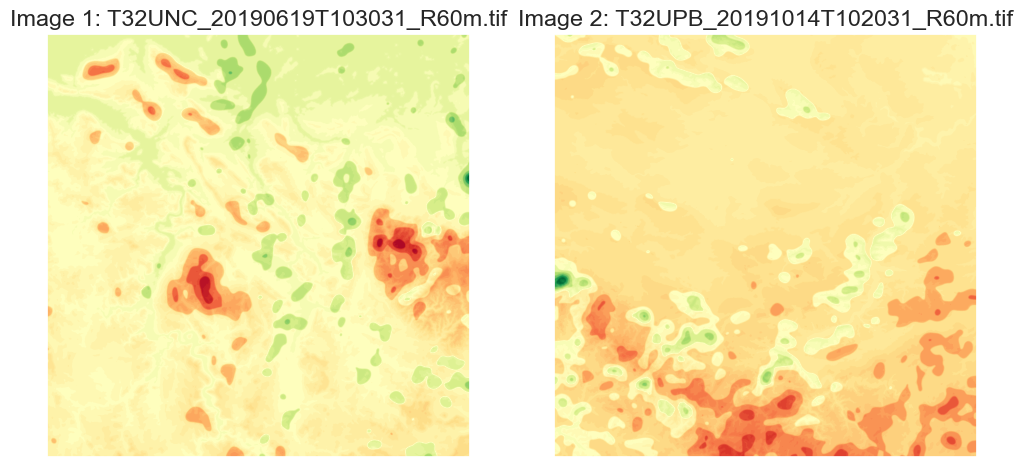

In [209]:
# Chemins des images à visualiser
image_paths = [os.path.join(input_folder, files[i]) for i in [0, 3] ]
img1 = image_paths[0]
img2 = image_paths[1]
key_name = '_'.join([(os.path.basename(f).split('_')
                      )[0] for  f in image_paths])
img1 = image_paths[0]
img2 = image_paths[1]
# Visualisation des images TIF
vis_folder = 'Visualisation'
with rasterio.open(img1) as src1, rasterio.open(img2) as src2:
    # Affichage des images
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    # Ajout des titres aux images
    ax1.set_title(f"Image 1: {files[0]}")
    ax2.set_title(f"Image 2: {files[3]}")
    # Enlèvement des valeurs sur les axes
    for ax in [ax1, ax2]:
        ax.set_xticks([])
        ax.set_yticks([])
    show(src1, ax=ax1, cmap='RdYlGn')
    show(src2, ax=ax2, cmap='RdYlGn')
    plt.savefig(os.path.join(vis_folder, key_name))
    plt.show()

#### II - Calcule d'indice, propriétés de la végétation et indexation

#### 2.1 - Fonction de traitment, etiquetage et calcul spectraux

##### 2.1.a - fonctions de visualisation : Profiles spectraux et différences spectrales bi-saisonnières

In [210]:
#recuparation de date à partir du nom du fichier
def date_info(filename):
    bn = os.path.basename(filename)
    ds = bn.split("_")[1].split("T")[0]
    return int(ds[:4]), int(ds[4:6])
#matchin de date et saison
def season(month):
    if month in range(3, 6): return "Printemps"
    if month in range(6, 9): return "Été"
    if month in range(9, 12): return "Automne"
    return "Hiver"
#Comparaison visuelle des changements spectraux pour chaque paire d'images
def compare_images(im1, im2, key_name=None):
    with rasterio.open(im1) as s1, rasterio.open(im2) as s2:
        image1, image2 = s1.read(1), s2.read(1)
        year1, month1 = date_info(im1)
        year2, month2 = date_info(im2)
        s1, s2 = season(month1), season(month2)
        # Création de la figure
        fig, axs = plt.subplots(2, 2, figsize=(10, 10))
        # Cartes des deux images
        axs[0, 0].imshow(image1, cmap='RdYlGn')# cmap='gray'
        axs[0, 0].set_title(f"{key_name} {calendar.month_name[month1]} {year1}")
        axs[0, 0].set_xticks([])
        axs[0, 0].set_yticks([])
        axs[0, 1].imshow(image2, cmap='RdYlGn')# cmap='gray'
        axs[0, 1].set_title(f"{key_name} {calendar.month_name[month2]} {year2}")
        axs[0, 1].set_xticks([])
        axs[0, 1].set_yticks([])
        # Différence spectrale
        diff = image2 - image1
        axs[1, 0].imshow(diff, cmap='bwr')# cmap='bwr' #'RdYlGn'
        axs[1, 0].set_title(
            f"Diff spectrale entre {s1} et {s2}"
            )
        axs[1, 0].set_xticks([])
        axs[1, 0].set_yticks([])
        axs[1, 0].spines['top'].set_visible(False)
        axs[1, 0].spines['right'].set_visible(False)
        axs[1, 0].spines['bottom'].set_visible(False)
        axs[1, 0].spines['left'].set_visible(False)
        # Profil spectral
        col = int(image1.shape[1]/2)
        axs[1, 1].plot(image2[:, col], color='red', 
                       label=f"{calendar.month_name[month2]} {year2}")
        axs[1, 1].plot(image1[:, col], color='blue', 
                       label=f"{calendar.month_name[month1]} {year1}")
        axs[1, 1].set_title("Profil spectral")
        axs[1, 1].set_xlabel('Lignes')
        axs[1, 1].set_ylabel('Réflectance')
        axs[1, 1].legend(loc='upper right')
        axs[1, 1].spines['top'].set_visible(False)
        axs[1, 1].spines['right'].set_visible(False)
        #plt.tight_layout()
        return(fig)

##### 2.1.b - fonctions d'etiquettage : Labelisation des images par pixel

In [211]:
#recupérer les valeurs pour la bande NIR disponible
def get_nir_band(band_dict):
    """
    Obtient la bande NIR (B08, B8A ou B07) dans un dictionnaire de bandes.
    :param band_dict: Dictionnaire de bandes
    :return: La bande NIR et le nom de la bande
    """
    if 'B08' in band_dict:
        nir = band_dict['B08']
        nir_band = 'B08'
    elif 'B8A' in band_dict:
        nir = band_dict['B8A']
        nir_band = 'B8A'
    elif 'B07' in band_dict:
        nir = band_dict['B07']
        nir_band = 'B07'
    else:
        raise ValueError("Unable to find NIR band (B08, B8A or B07)")
    # Afficher la bande NIR utilisée
    #print(f"NIR band used: {nir_band}")
    return nir, nir_band
#labeliser les pixels dans les images de cartes
def labeling_pixel(input_folder, output_folder=None, class_names=None,
                   NDVI_threshold=0.2, SW1_threshold=0.5, SW2_threshold=0.3):
    # Sélectionner les bandes nécessaires au calcul des indices
    select_bands_tags = ['B04','B07','B08','B8A','B05','B06']
    #select_bands_desc = ['Red','NIR','Red Edge','NDVI','SW1','SW2']
    for f in os.listdir(input_folder):
        with rasterio.open(os.path.join(input_folder, f)) as src:
            # Récupérer les bandes sélectionnées
            indexed_bands = zip(
                ast.literal_eval(src.tags()['bands']), src.indexes)
            select_band_dict = {tag: src.read(index) for tag, 
                         index in indexed_bands if tag in select_bands_tags}
            # Bandes pour calculs d'indices de végétation
            red = select_band_dict['B04']
            nir, nir_band = get_nir_band(select_band_dict)
            red_edge_05, red_edge_06 = select_band_dict['B05'], select_band_dict['B06']
            # Calcul des indices
            ndvi = (nir - red) / (nir + red + 0.0001)
            sw1 = red_edge_05 / (nir + 0.0001)
            sw2 = red_edge_06 / (nir + 0.0001)
            # Pixel labeling using decision tree rules
            labeled = np.zeros_like(red, dtype=np.uint8)
            #Cropland
            labeled[(ndvi < NDVI_threshold) & (sw1 < SW1_threshold)] = 5
            #Grassland/Herbaceous
            labeled[(ndvi >= NDVI_threshold) & (sw1 < SW1_threshold) & (sw2 < SW2_threshold)] = 0
            #Broadleafed woody vegetation
            labeled[(ndvi >= NDVI_threshold) & (sw1 >= SW1_threshold) & (sw2 < SW2_threshold)] = 1
            #Coniferous woody vegetation
            labeled[(ndvi >= NDVI_threshold) & (sw1 < SW1_threshold) & (sw2 >= SW2_threshold)] = 2
            #Built-up
            labeled[(ndvi >= NDVI_threshold) & (sw1 >= SW1_threshold) & (sw2 >= SW2_threshold)] = 3
            #Water
            labeled[(ndvi < NDVI_threshold) & (sw1 >= SW1_threshold)] = 4
            #tags = src.tags()
            #le dossier de sortie
            os.makedirs(output_folder, exist_ok=True) if output_folder else None
            out_meta = src.meta.copy()
            out_meta.update({'count': len(src.indexes)+1,
                            'description': "Pixel-wise classification with NDVI and SWIR indices"
                            })
            out_file = os.path.join(output_folder, f[:-4] + "_labeled.tif")
            with rasterio.open(out_file, 'w', **out_meta) as dst:
                for i, (tag, band) in enumerate(select_band_dict.items()):
                    dst.write(band, i+1)
                # Ajout de la nouvelle bande d'étiquettes
                dst.write(labeled, len(src.indexes)+1) 
                # Copier les tags de src
                tags = src.tags()
                # Mettre à jour les tags pour la nouvelle bande d'étiquettes
                tags = {str(k): v for k, v in tags.items()}
                dst.update_tags(**tags)

##### 2.1.c - fonctions de création de dictionnaire : regroupement des TIF la zone capturée

In [212]:
def create_image_dict(input_folder):
    """
    Crée un dictionnaire de paires d'images qui se chevauchent et de
    fichiers uniques qui n'ont pas de paire.
    """
    image_pairs = {}
    single_images = {}
    for file in os.listdir(input_folder):
        if file.endswith(".tif") or file.endswith("_labeled.tif") :
            location = file[:6]
            if location in image_pairs:
                image_pairs[location].append(os.path.join(input_folder, file))
            elif location in single_images:
                image_pairs[location] = [(single_images[location],
                                          os.path.join(input_folder, file))]
                del single_images[location]
            else:
                single_images[location] = os.path.join(input_folder, file)
    return image_pairs, single_images

#### 2.2 - Analyse exploratoire / Descriptive des données

##### 2.2.a - récupérer une liste des images qui sont des caputres saisonnières d'une même zone géographique

In [213]:
#les paires d'images qui se chevauchent 
# dictionnaire pour stocker des paires d'images qui se chevauchent
input_folder ="sentinels_data"
image_pairs, single_images = create_image_dict(input_folder)

##### 2.2.b - visualiser les profils spectraux bi-saisonniers (detection de chagement)

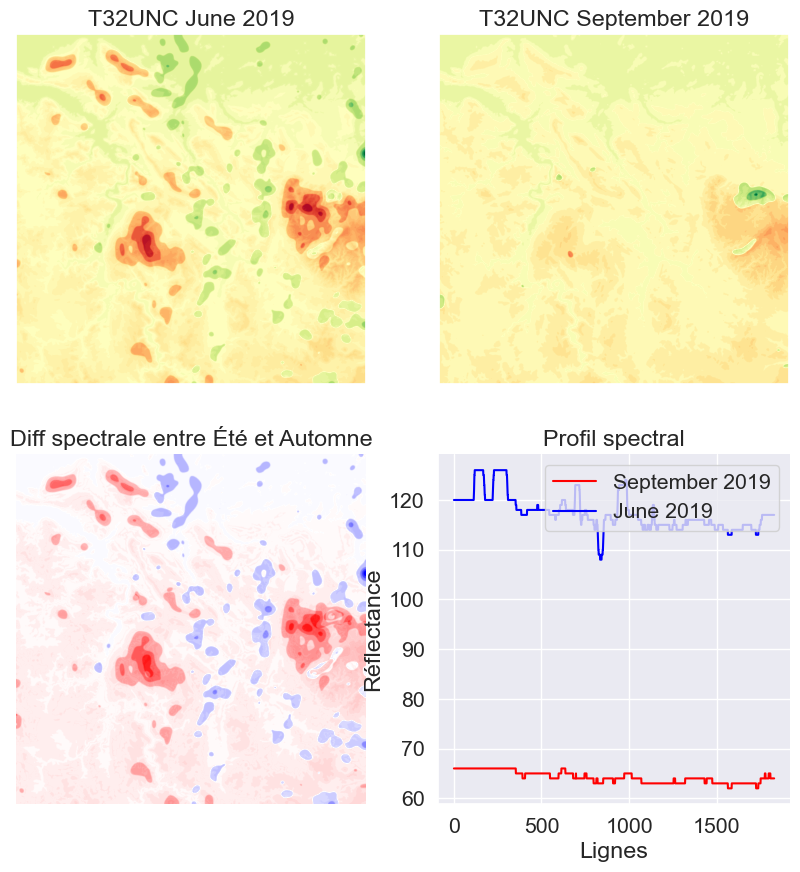

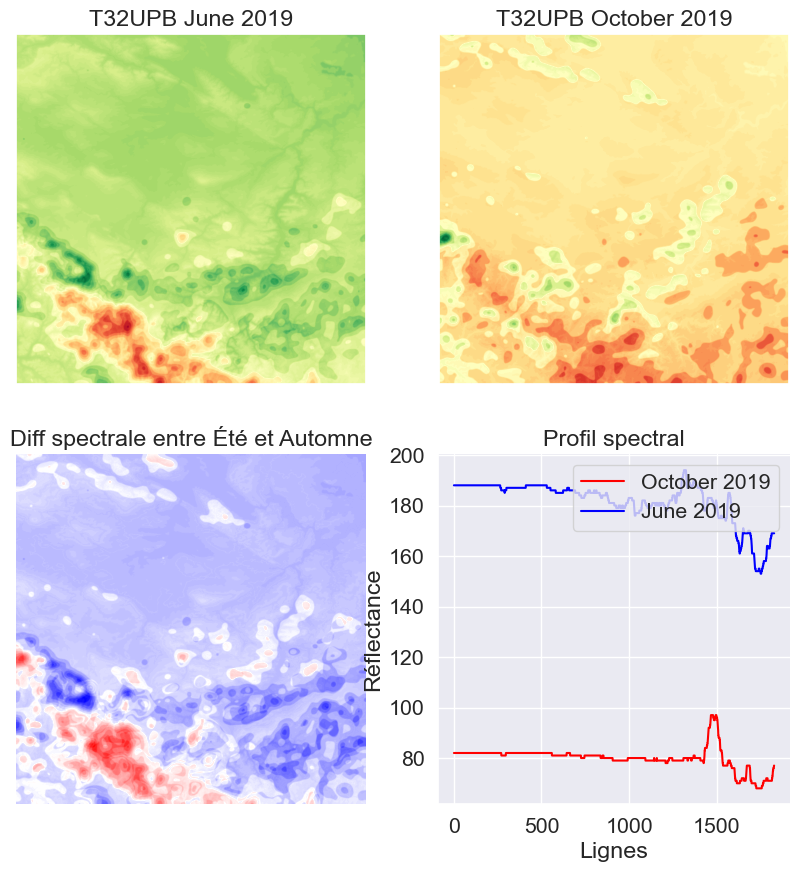

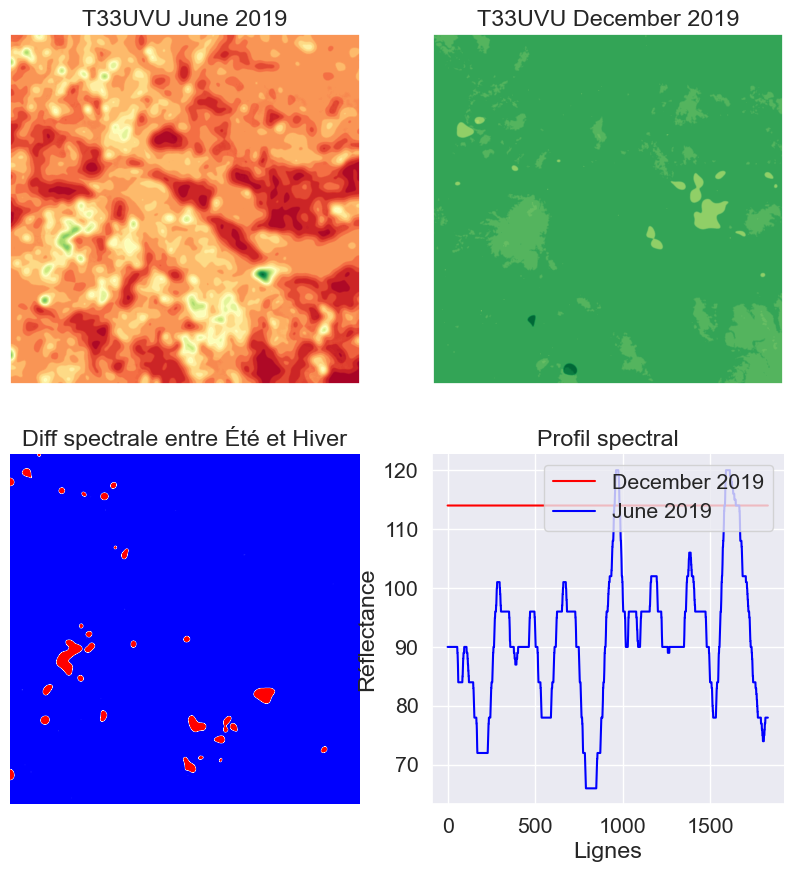

In [214]:
#dossier de sortie des images
if not os.path.exists(vis_folder):
    os.mkdir(vis_folder)
# Comparaison visuelle des changements spectraux pour chaque paire d'images
for key, pairs in image_pairs.items():
    for pair in pairs:
        try:
            fig_pair = compare_images(pair[0], pair[1], key)
            plt.savefig(os.path.join(vis_folder, key))
        except rasterio.errors.RasterioError:
            print(f"Impossible d'ouvrir l'image {pair[0]} ou {pair[1]}")

#### 2.3 - Etiquettage des images (sol, forêt, eau etc.) pour préparer les données au modèle

La compréhension des propriétés de la végétation, des indices de végétation, des profils spectraux et des techniques de télédétection est importante pour la classification d'images à grande échelle, en particulier pour la cartographie de la végétation. Ces concepts permettent de caractériser la végétation de manière quantitative et de faire de l'identification à partir de données télédétectées.

Les propriétés de la végétation sont liées à sa capacité à absorber, réfléchir ou transmettre certaines longueurs d'onde de la lumière visible et du rayonnement infrarouge. Cette interaction entre la végétation et la lumière peut être quantifiée à l'aide d'indices de végétation, tels que l'indice de végétation par différence normalisée (NDVI), qui sont des combinaisons linéaires des réflectances de différentes bandes spectrales. L'indice NDVI mesure la différence normalisée entre la réflectance dans le proche infrarouge (NIR) et la réflectance dans le rouge, et est utilisé pour estimer la densité de la couverture végétale. Les valeurs de l'indice NDVI varient de -1 à 1, avec des valeurs élevées indiquant une forte densité de la couverture végétale et des valeurs faibles indiquant une faible densité. Ainsi, Le profil spectral d'un objet est sa réponse spectrale, qui représente la quantité de lumière réfléchie ou absorbée par l'objet dans chaque bande spectrale. Le profil spectral d'une couverture végétale peut varier en fonction de facteurs tels que la densité de la couverture, la santé de la végétation et le type de végétation.

Calculer les indices, on utilises de l'image en l'occurance le rouge et le proche infrarouge (NIR) sont utilisés pour calculer l'indice de végétation par différence normalisée (NDVI), qui est un indicateur de la végétation et ondes courtes (SW1 et SW2) sont utilisées pour détecter l'eau et les zones humides.
L'affectation pour chaque classe est basée sur la combinaison de seuils de valeurs pour les indices et ces seuils peuvent être ajustées en fonction de la zone géographique et des caractéristiques de la scène. Les seuils peuvent également être définis de manière à ce qu'ils soient plus stricts pour certaines classes, en fonction de la difficulté à les distinguer des autres classes. La mise en place de ces seuils nécessite une connaissance approfondie de la signature spectrale des différentes classes d'intérêt, ainsi qu'une certaine expérience dans l'interprétation des images satellite.

Les bandes Sentinel-2 sont différentes longueurs d'onde captées par le satellite Sentinel-2 :

- AOT : Aerosol Optical Thickness (Épaisseur optique des aérosols)
- B01 : Bande 1 (Bleue) - 443 nm
- B02 : Bande 2 (Violette/bleu clair) - 490 nm
- B03 : Bande 3 (Verte) - 560 nm
- B04 : Bande 4 (Rouge) - 665 nm
- B05 : Bande 5 (Rouge vif) - 705 nm
- B06 : Bande 6 (Infrarouge moyen 1) - 740 nm
- B07 : Bande 7 (Infrarouge moyen 2) - 783 nm
- B09 : Bande 9 (Infrarouge largeur de bande) - 945 nm
- B11 : Bande 11 (Infrarouge moyen 3) - 1610 nm
- B12 : Bande 12 (Infrarouge moyen 4) - 2190 nm
- B8A : Bande 8A (Infrarouge étroit) - 865 nm
- SCL : Scene Classification Map (Carte de classification de la scène)
- TCI : True Color Image (Image en couleurs réelles)
- WVP : Water Vapor (Vapeur d'eau)
Les noms de bandes peuvent varier en fonction du logiciel ou de la plateforme utilisée. Les noms mentionnés ci-dessus sont couramment utilisés dans les analyses d'imagerie satellitaire à partir des données Sentinel-2. 

- Le rouge (RED) correspond à la bande B04
- Le proche-infrarouge (NIR) correspond à la bande B08 ou B8A ou B07
- Le red edge correspond à la bande B05 ou B06
- Le SWIR1 correspond à la bande B11
- Le SWIR2 correspond à la bande B12

Ces bandes sont utilisées pour calculer les indices de végétation tels que l'indice de végétation par différence normalisée (NDVI) et pour identifier les caractéristiques de la surface terrestre :

- NDVI = (NIR - RED) / (NIR + RED)
- SW1 = B05 / RED
- SW2 = B06 / RED

Les seuils utilisés pour classifier les pixels sont les suivants :

- NDVI_threshold = 0.2
- SW1_threshold = 0.5
- SW2_threshold = 0.3

Les classes utilisées pour classifier les pixels sont :

- Classe 0 : Eau (Water)
- Classe 1 : Zone construite (Built-up)
- Classe 2 : Végétation herbacée (Grassland/Herbaceous)
- Classe 3 : Végétation à feuilles larges (Broadleafed woody vegetation)
- Classe 4 : Végétation à feuilles conifères (Coniferous woody vegetation)
- Classe 5 : Terres cultivées (Cropland)

##### 2.3.a - labeliser les pixels pour la classification

In [215]:
# Exemple d'utilisation de la fonction
input_folder = "sentinels_data"
output_folder = "labeled_data"
# Define the colors for each class
labeling_pixel(input_folder, output_folder)

#### 2.4 - propriétés de la végétation et indices

#### III - Télédetection : Classification des images - Decision tree

#### 3.1 - Fonction de construction, entrainement et validation de l'Arbre de décision

##### 3.1.a - fonction pour créer des listes de fichiers d'entraînement, de test et de validation

In [216]:
# Fonction pour créer des listes de fichiers d'entraînement, de test et de validation
def create_train_test_lists(input_folder):
    # Création d'un dictionnaire d'images
    image_pairs, single_images = create_image_dict(input_folder)
    # Ajout de la première image de chaque paire à la liste d'entraînement
    train_files = [pair[0][0] for pair in image_pairs.values()]
    # Ajout de la deuxième image de chaque paire à la liste de test
    test_files = [pair[0][1] for pair in image_pairs.values()]
    # Ajout des images seules à la liste de validation
    validation_files = list(single_images.values())
    return train_files, test_files, validation_files

##### 3.1.b - fonction pour lire les données d'une image

In [217]:
# Fonction pour lire les données d'une image
def read_data(filepath):
    with rasterio.open(filepath) as src:
        # Lecture de chaque bande de l'image, sauf la dernière (étiquettes)
        bands = [src.read(i, out_shape=(src.height // 4, src.width // 4)
                          ) for i in range(1, src.count)]
        # Conversion des bandes en un tableau numpy
        X = np.stack(bands, axis=-1)
        # Lecture de la dernière bande (étiquettes)
        y = src.read(src.count, out_shape=(src.height // 4, src.width // 4))
    return X, y

##### 3.1.c - fonction pour entraîner un modèle Decision Tree

In [218]:
# Fonction pour entraîner un modèle Decision Tree
def train_dt(X_train, y_train, max_depth=None, random_state=42):
    # Initialisation du modèle
    dt = DecisionTreeClassifier(
        max_depth=max_depth, random_state=random_state
    )
    # Entraînement du modèle sur les données d'entraînement
    dt.fit(X_train.reshape(-1, X_train.shape[-1]), y_train.ravel())
    return dt

##### 3.1.d -  fonction pour tester un modèle Decision Tree

In [219]:
# Fonction pour tester un modèle Decision Tree
def test_dt(dt, X_test, y_test):
    # Prédiction des étiquettes à partir des données de test
    y_pred = dt.predict(X_test.reshape(-1, X_test.shape[-1]))
    # Calcul des métriques de précision, rappel, F-score et support
    precision, recall, fscore, support = precision_recall_fscore_support(
        y_test.ravel(), y_pred, average='weighted'
    )
    # Affichage des métriques
    print(f"Accuracy: {accuracy_score(y_test.ravel(), y_pred)}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F-score: {fscore}")
    print(f"Support: {support}")

##### 3.1.e -  fonction pour faire la validation croisée Decision Tree

In [220]:
def cross_validation_dt(input_files, class_names, n_splits=2,
                        n_estimators=100,max_depth=None, 
                        max_features=None, random_state=42):
    # Création des listes d'entraînement, de test et de validation
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    
    # Initialisation des scores de validation croisée
    scores = {'accuracy': [], 'precision': [], 
              'recall': [], 'f1-score': []}
    
    # Calcul de la matrice de confusion moyenne
    conf_matrix = np.zeros((len(class_names), len(class_names)), dtype=int)
    
    for train_index, test_index in kf.split(input_files):
        # Séparation des données en ensembles d'entraînement et de test
        X_train, y_train = [], []
        for file_index in train_index:
            X, y = read_data(input_files[file_index])
            X_train.append(X[:,:,0:15])
            y_train.append(y)
        
        # Fusion des ensembles d'entraînement et de validation
        X_test, y_test = read_data(input_files[test_index[0]])
        X_test = X_test[:,:,0:15]
        X_train = np.concatenate(X_train)
        y_train = np.concatenate(y_train)
        
        # Entraînement du modèle
        dt = DecisionTreeClassifier(max_depth=max_depth, 
                                     max_features=max_features, 
                                     random_state=random_state)
        dt.fit(X_train.reshape(-1, X_train.shape[-1]), y_train.ravel())
        
        # Prédiction des étiquettes pour l'ensemble de test
        y_pred = dt.predict(X_test.reshape(-1, X_test.shape[-1]))
        
        # Calcul de la matrice de confusion
        conf_matrix += confusion_matrix(
            y_test.ravel(), y_pred, labels=list(class_names.keys()))
        
        # Calcul des scores pour chaque fold
        accuracy, precision, recall, f1_score = precision_recall_fscore_support(
            y_test.ravel(), y_pred, labels=list(class_names.values()), 
            average='weighted', zero_division=0)[:4]
        
        # Ajout des scores pour le fold courant
        if (accuracy is not None and 
            precision is not None and 
            recall is not None and 
            f1_score is not None):
            scores['accuracy'].append(accuracy)
            scores['precision'].append(precision)
            scores['recall'].append(recall)
            scores['f1-score'].append(f1_score)
    
    # Calcul de la matrice de confusion moyenne
    conf_matrix = conf_matrix / np.sum(conf_matrix) * 100
    
    # Affichage graphique de la matrice de confusion moyenne
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='.1f', 
                xticklabels=class_names.values(), 
                yticklabels=class_names.values())
    plt.xlabel('Prédiction')
    plt.ylabel('Vérité Terrain')
    plt.title('Matrice de confusion moyenne')
    plt.savefig('visualisation/confusion_matrix_dt.png')
    
    # Calcul des scores moyens de validation croisée
    mean_scores = {k: np.mean(scores[k]) for k in scores.keys()}
    
    # Affichage des scores moyens de validation croisée
    mean_accuracy = np.mean(scores['accuracy'])
    mean_precision = np.mean(scores['precision'])
    mean_recall = np.mean(scores['recall'])
    mean_f1_score = np.mean(scores['f1-score'])
    print(f'Cross-validation results (n_splits={n_splits}'
          f', n_estimators={n_estimators}, '
        f'max_depth={max_depth}, max_features={max_features}):')
    print(f"Accuracy: {mean_accuracy*100:.2f}%")
    print(f"Precision: {mean_precision*100:.2f}%")
    print(f"Recall: {mean_recall*100:.2f}%")
    print(f"F1-score: {mean_f1_score*100:.2f}%")


#### 3.2 - Constitution des données d'entrainement, de test et construction du modèle

In [221]:
# Create lists of training, test, and validation files
train_files, test_files, validation_files = create_train_test_lists("labeled_data")

#### 3.3 - Entrainement et test du modèle

In [222]:
#données d'image pour le test entrainer le modèle
images_data = [read_data(filepath) for filepath in train_files]
#préparation des données d'entrainement et de test
X_list, y_list = zip(*images_data)
X_train_list, X_test_list, y_train_list, y_test_list = train_test_split(
    X_list, y_list, test_size=0.2, random_state=42)

In [223]:
#test du model
X_test = np.concatenate(X_test_list, axis=0)
y_test = np.concatenate(y_test_list, axis=0)
test_rf(rf, X_test, y_test)

Accuracy: 0.996758423550029
Precision: 0.9967506043331357
Recall: 0.996758423550029
F-score: 0.9967524726970113
Support: None


#### 3.4 -  Validation croisée et performance du modèle

c:\Users\kouno\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
c:\Users\kouno\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\arraysetops.py:729: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


Cross-validation results (n_splits=2, n_estimators=100, max_depth=None, max_features=None):
Accuracy: nan%
Precision: nan%
Recall: nan%
F1-score: nan%


c:\Users\kouno\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\kouno\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


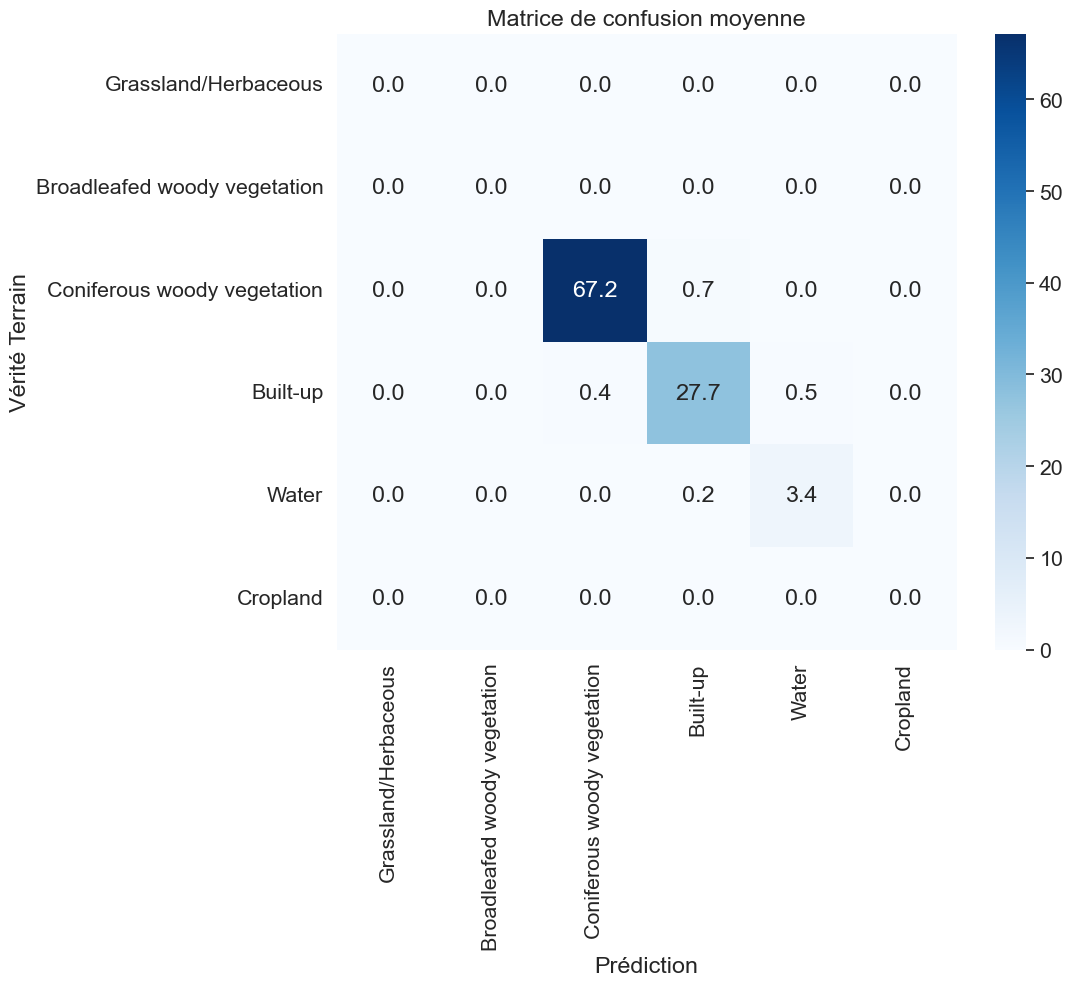

In [224]:
class_names = {
0: "Grassland/Herbaceous",
1: "Broadleafed woody vegetation",
2: "Coniferous woody vegetation",
3: "Built-up",
4: "Water",
5: "Cropland"
}
cross_validation_dt(validation_files,class_names)

#### IV - Télédetection : Classification des images Forêts Aléatoire (Bagging)

#### 4.1 - Fonction de construction, entrainement et validation du Random Forest

##### 4.1.a - fonction pour entraîner un modèle Random Forest

In [225]:
# Fonction pour entraîner un modèle Random Forest
def train_rf(X_train, y_train, n_estimators=100, max_depth=None, 
             max_features='sqrt', random_state=42):
    # Initialisation du modèle
    rf = RandomForestClassifier(n_estimators=n_estimators,
                                 max_depth=max_depth,
                                 max_features=max_features,
                                 random_state=random_state,
                                 min_samples_split=10,
                                 n_jobs=-1)
    # Entraînement du modèle sur les données d'entraînement
    rf.fit(X_train.reshape(-1, X_train.shape[-1]), y_train.ravel())
    return rf

##### 4.1.b - fonction pour tester un modèle Random Forest

In [226]:
# Fonction pour tester un modèle Random Forest
def test_rf(rf, X_test, y_test):
    # Prédiction des étiquettes à partir des données de test
    y_pred = rf.predict(X_test.reshape(-1, X_test.shape[-1]))
    # Calcul des métriques de précision, rappel, F-score et support
    precision, recall, fscore, support = precision_recall_fscore_support(
        y_test.ravel(), y_pred, average='weighted')
    # Affichage des métriques
    print(f"Accuracy: {accuracy_score(y_test.ravel(), y_pred)}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F-score: {fscore}")
    print(f"Support: {support}")

##### 4.1.c - fonction d'evation du modèle par validation croisée

In [227]:
def cross_validation_rf(input_files, class_names, n_splits=2, 
                     n_estimators=100, max_depth=None, 
                     max_features='sqrt', random_state=42):
     # Création des listes d'entraînement, de test et de validation
    kf = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
     # Initialisation des scores de validation croisée
    scores = {'accuracy': [], 'precision': [], 
              'recall': [], 'f1-score': []}
    # Calcul de la matrice de confusion moyenne
    conf_matrix = np.zeros((len(class_names), len(class_names)), dtype=int)
    for train_index, test_index in kf.split(input_files):
        # Séparation des données en ensembles d'entraînement et de test
        X_train, y_train = [], []
        for file_index in train_index:
            X, y = read_data(input_files[file_index])
            X_train.append(X[:,:,0:15])
            y_train.append(y)
        # Fusion des ensembles d'entraînement et de validation
        X_test, y_test = read_data(input_files[test_index[0]])
        X_test = X_test[:,:,0:15]
        X_train = np.concatenate(X_train)
        y_train = np.concatenate(y_train)
        # Entraînement du modèle
        rf = train_rf(X_train.reshape(-1, X_train.shape[-1]), y_train.ravel(), 
                      n_estimators=n_estimators, max_depth=max_depth, 
                      max_features=max_features, random_state=random_state)
         # Test du modèle
        test_rf(rf, X_test.reshape(-1, X_test.shape[-1]), y_test.ravel())
        # Prédiction des étiquettes pour l'ensemble de test
        y_pred = rf.predict(X_test.reshape(-1, X_test.shape[-1]))
         # Calcul de la matrice de confusion
        conf_matrix += confusion_matrix(
            y_test.ravel(), y_pred, 
        labels=list(class_names.keys()))
        accuracy, precision, recall, f1_score = precision_recall_fscore_support(
            y_test.ravel(), y_pred, labels=list(class_names.values()), 
            average='weighted', zero_division=0)[:4]
        if (accuracy is not None and 
            precision is not None and 
            recall is not None and 
            f1_score is not None):
            scores['accuracy'].append(accuracy)
            scores['precision'].append(precision)
            scores['recall'].append(recall)
            scores['f1-score'].append(f1_score)

        # Calcul de la matrice de confusion moyenne
    conf_matrix = conf_matrix / np.sum(conf_matrix) * 100
    # Affichage graphique de la matrice de confusion moyenne
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='.1f', 
                xticklabels=class_names.values(), 
                yticklabels=class_names.values())
    plt.xlabel('Prédiction')
    plt.ylabel('Vérité Terrain')
    plt.title('Matrice de confusion moyenne')
    plt.savefig('visualisation/confusion_matrix.png')
     # Calcul des scores moyens de validation croisée

    mean_scores = {k: np.mean(scores[k]) for k in scores.keys()}
    # Affichage des scores moyens de validation croisée
    mean_accuracy = np.mean(scores['accuracy'])
    mean_precision = np.mean(scores['precision'])
    mean_recall = np.mean(scores['recall'])
    mean_f1_score = np.mean(scores['f1-score'])
    print(f'Cross-validation results (n_splits={n_splits}'
          f', n_estimators={n_estimators}, '
        f'max_depth={max_depth}, max_features={max_features}):')
    print(f"Accuracy: {mean_accuracy*100:.2f}%")
    print(f"Precision: {mean_precision*100:.2f}%")
    print(f"Recall: {mean_recall*100:.2f}%")
    print(f"F1-score: {mean_f1_score*100:.2f}%")

##### 4.1.d - fonction de prédiction et de création de carte colorée selon les valeurs prédites

#F
def predict_image(filepath, model, colors):
    # Lecture des données de l'image
    X, y_true = read_data(filepath)
    # Prédiction des étiquettes à partir des données de l'image
    y_pred = model.predict(X.reshape(-1, X.shape[-1]))
    y_pred = y_pred.reshape(y_true.shape)
    # Affichage du rapport de classification
    report = classification_report(y_true.ravel(), y_pred.ravel())
    print(report)
    # Affichage de la précision
    accuracy = accuracy_score(y_true.ravel(), y_pred.ravel())
    print(f"Accuracy: {accuracy}")
    # Calcul de la matrice de confusion
    cm = confusion_matrix(y_true.ravel(), y_pred.ravel())
    # Création de la figure de prédiction
    fig, ax = plt.subplots(figsize=(8, 8))
    plt.imshow(rasterio.plot.reshape_as_image(y_pred), cmap='jet')
    plt.axis('off')
    plt.title("Predicted Classes")
    plt.tight_layout()
    # Ajout de la filigrane avec les classes
    classes = list(colors.keys())
    handles = [plt.plot([],[],color=colors[c], ls="", marker=".", \
              markersize=np.sqrt(100), alpha=0.8)[0] for c in classes]
    labels = [f"{c}" for c in classes]
    leg = plt.legend(handles, labels, loc=(1.05, 0.5), fontsize=12, \
               frameon=True, framealpha=1)
    leg.set_title("Classes", prop = {'size':'large'})
    plt.gca().add_artist(leg)
    # Création de la figure de vérité terrain
    fig_gt, ax_gt = plt.subplots(figsize=(8, 8))
    plt.imshow(rasterio.plot.reshape_as_image(y_true), cmap='jet')
    plt.axis('off')
    plt.title("Ground Truth Classes")
    plt.tight_layout()
    # Ajout de la filigrane avec les classes
    handles = [plt.plot([],[],color=colors[c], ls="", marker=".", \
              markersize=np.sqrt(100), alpha=0.8)[0] for c in classes]
    labels = [f"{c}" for c in classes]
    leg = plt.legend(handles, labels, loc=(1.05, 0.5), fontsize=12, \
               frameon=True, framealpha=1)
    leg.set_title("Classes", prop = {'size':'large'})
    plt.gca().add_artist(leg)
    # Enregistrement des figures
    name = os.path.splitext(os.path.basename(filepath))[0]
    plt.savefig(f"visualisation/{name}_prediction.png", dpi=300)
    plt.savefig(f"visualisation/{name}_ground_truth.png", dpi=300)
    # Affichage de la matrice de confusion
    print("Confusion Matrix")
    print(cm)
    return report, accuracy, cm, fig, fig_gt

#### 4.2 - Entrainement et test du modèle

In [228]:
#entraînement d'un modèle de forêt aléatoire
X_train = np.concatenate(X_train_list, axis=0)
y_train = np.concatenate(y_train_list, axis=0)
rf = train_rf(X_train, y_train)

In [229]:
#test du model
X_test = np.concatenate(X_test_list, axis=0)
y_test = np.concatenate(y_test_list, axis=0)
test_rf(rf, X_test, y_test)

Accuracy: 0.996758423550029
Precision: 0.9967506043331357
Recall: 0.996758423550029
F-score: 0.9967524726970113
Support: None


#### 4.3 -  Validation croisée et performance du modèle

In [230]:
class_names = {
0: "Grassland/Herbaceous",
1: "Broadleafed woody vegetation",
2: "Coniferous woody vegetation",
3: "Built-up",
4: "Water",
5: "Cropland"
}
cross_validation_rf(validation_files,class_names)

c:\Users\kouno\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9772084137343248
Precision: 0.9798853344406686
Recall: 0.9772084137343248
F-score: 0.9779767082242943
Support: None


#### V - Comparaison de carte colorée par classifications et valeurs réelle

#### 5.1 -  Prédiction avec carte colorée selon les etiquetes prédites

# Définition du chemin de l'image à prédire

# Définition des couleurs pour chaque classe
colors = {
    "Built-up": [255, 0, 0],  # Rouge
    "Grassland/Herbaceous": [0, 255, 0],  # Vert
    "Broadleafed woody vegetation": [0, 0, 255],  # Bleu
    "Coniferous woody vegetation": [255, 255, 0],  # Jaune
    "Cropland": [255, 0, 255],  # Magenta
    "Water": [0, 255, 255]  # Cyan
}

# Prédiction de l'image et affichage des résultats
report, accuracy, cm, fig, fig_gt = predict_image(filepath, rf, colors)


#### 5.2 - Comparaison visuelle carte prédite vs Carte colorée par classifiction

# Chemins des images à visualiser
image_rw="predicted_data/T32UNC_20190619T103031_R60m.tif"
image_cl=""
# Visualisation des images TIF
with rasterio.open(image_rw) as src1, rasterio.open(image_cl) as src2:
    # Affichage des images
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    # Ajout des titres aux images
    ax1.set_title(f"Image Originale")
    ax2.set_title(f"Image Class-Colorée")
    # Enlèvement des valeurs sur les axes
    for ax in [ax1, ax2]:
        ax.set_xticks([])
        ax.set_yticks([])
    show(src1, ax=ax1, cmap='RdYlGn')
    show(src2, ax=ax2, cmap='RdYlGn')
    plt.show()

# Chargement des résultats de la forêt aléatoire
rf_classification = rasterio.open("random_forest_classification.tif").read(1)
rf_accuracy = pd.read_csv("rapport_classification.csv")["accuracy"].values[0]
rf_cm = np.load("matrice_confusion.npy")

# Chargement des résultats de la forêt aléatoire avec Bagging
bagging_classification = rasterio.open("bagging_classification.tif").read(1)
bagging_accuracy = pd.read_csv("rapport_classification_bagging.csv")["accuracy"].values[0]
bagging_cm = np.load("matrice_confusion_bagging.npy")

# Affichage des cartes classifiées côte à côte
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(rf_classification, cmap="viridis")
axes[0].set_title(f"Random Forest (Accuracy: {rf_accuracy:.2%})")
axes[1].imshow(bagging_classification, cmap="viridis")
axes[1].set_title(f"Random Forest with Bagging (Accuracy: {bagging_accuracy:.2%})")
plt.tight_layout()
plt.savefig("Visualisation/carte_comparee.png")

# Affichage des matrices de confusion côte à côte
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(rf_cm, cmap="viridis")
axes[0].set_title(f"Random Forest Confusion Matrix")
axes[1].imshow(bagging_cm, cmap="viridis")
axes[1].set_title(f"Random Forest with Bagging Confusion Matrix")
plt.tight_layout()
plt.savefig("Visualisation/confusion_matrix_comparee.png")


#### 5.3- Évaluation de l'exactitude